In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import healpy as hp
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Noise
from dance.data import PICO
from dance.utils import download_file

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/home/alonappan/scratch/DANCE'
nside = 2048


In [4]:
noise = Noise(basedir, nside)

In [5]:
noise.depth_p_ilc('uk-arcmin')

0.8601532502481252

In [9]:
nmap = noise.get_EB()

In [10]:
elm,blm = nmap

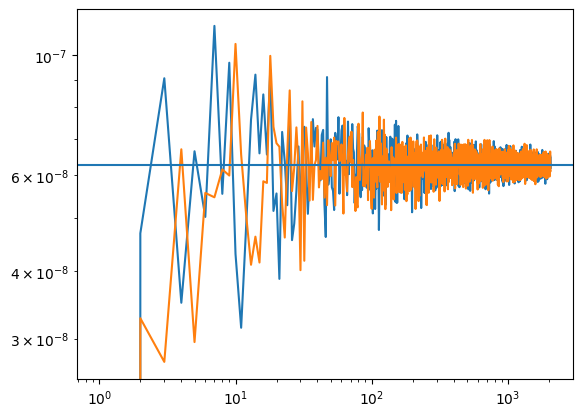

In [11]:
plt.loglog(hp.alm2cl(elm),label='E')
plt.loglog(hp.alm2cl(blm),label='B')
plt.axhline(noise.depth_p_ilc())

In [55]:
noise.fwhm_ilc('arcmin')

7.446504148981525

In [40]:
noise_arr = np.radians(np.array(noise.config['Baseline'])/60)**2
beam_arr = np.array(noise.config['FWHM'])

inv_noise = np.nan_to_num(1.0 / noise_arr)
sum_inv_noise = np.sum(inv_noise)


weights = inv_noise / sum_inv_noise

N_eff = 1.0 / sum_inv_noise  

B_eff = np.sum(weights * np.radians(beam_arr/60), axis=0) 

In [41]:
N_eff

6.260426251779695e-08

In [42]:
B_eff

0.0021661002527190993

In [43]:
bl = hp.gauss_beam(B_eff, lmax=3*nside-1)

In [22]:
bl

array([1.00000000e+000, 9.99977499e-001, 9.99932500e-001, ...,
       5.12515635e-185, 4.46362275e-185, 3.88738965e-185])

In [34]:
np.nan_to_num((np.ones(3*nside)*N_eff)/bl**2)

/tmp/ipykernel_1307382/3790898243.py:1: RuntimeWarning: divide by zero encountered in divide
  np.nan_to_num((np.ones(3*nside)*N_eff)/bl**2)
/tmp/ipykernel_1307382/3790898243.py:1: RuntimeWarning: overflow encountered in divide
  np.nan_to_num((np.ones(3*nside)*N_eff)/bl**2)


array([6.26042625e-008, 6.26070799e-008, 6.26127150e-008, ...,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308])

/mnt/home/alonappan/workspace/dance/examples/../dance/simulations/noise.py:27: RuntimeWarning: divide by zero encountered in divide
/mnt/home/alonappan/workspace/dance/examples/../dance/simulations/noise.py:27: RuntimeWarning: overflow encountered in divide


(1e-08, 1e-06)

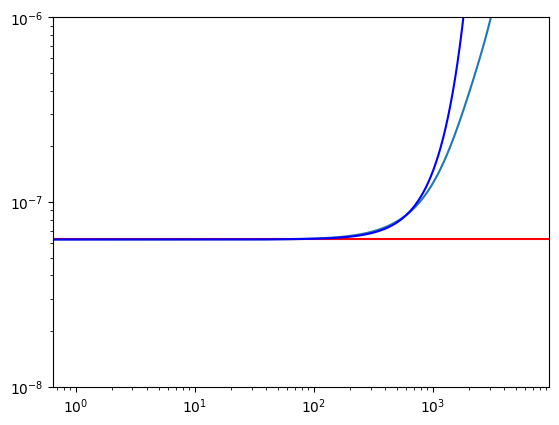

In [44]:
plt.loglog(noise.ilc())
plt.axhline(N_eff, color='r')
plt.loglog(np.nan_to_num((np.ones(3*nside)*N_eff)/bl**2), color='b')
plt.ylim(1e-8, 1e-6)


In [45]:
60 * np.degrees(B_eff)

7.446504148981525